In [20]:
import importlib
import data_clean_Kmodes
import data_cleaning
importlib.reload(data_cleaning)
import data_visualization_fran
importlib.reload(data_visualization_fran)
import data_visualization_kira
importlib.reload(data_visualization_kira)

<module 'data_visualization_kira' from 'd:\\ECE143\\project\\final\\heart-disease-analysis\\SubmissionFiles\\data_visualization_kira.py'>

In [ ]:
cleaned_data = data_cleaning.main()
cleaned_data_Kmodes = data_clean_Kmodes.main()

Num rows before cleaning: 10000
Num of cols before cleaning: 21

Num of rows after cleaning with DROP: 7067
Num of cols after cleaning with DROP: 21
Duplicate rows in cleaned DROP: 0

Num of rows after cleaning with KNN: 10000
Num of cols after cleaning with KNN: 21
Duplicate rows in cleaned KNN: 0

Gender
Male      3564
Female    3503
Name: count, dtype: int64

Number of men in clean with DROP: 3564
Number of women in clean with DROP: 3503

Gender
Male      5022
Female    4978
Name: count, dtype: int64

Number of men in clean with KNN: 5022
Number of women in clean with KNN: 4978
Heart Disease Status
No     2000
Yes    2000
Name: count, dtype: int64


In [25]:
print(cleaned_data_Kmodes.shape[0])
print(cleaned_data_Kmodes.shape[1])

10000
21


In [ ]:
numerical_vars = ["Age", "Blood Pressure", "Cholesterol Level", "BMI", "Sleep Hours", "Triglyceride Level", "Fasting Blood Sugar", "CRP Level", "Homocysteine Level"]

categorical_vars = ['Gender', 'Exercise Habits', 'Smoking', 'Family Heart Disease', 'Diabetes', 'High Blood Pressure', 'Low HDL Cholesterol', 'High LDL Cholesterol', 'Alcohol Consumption', 'Stress Level', 'Sugar Consumption']

outcomes = ["Stress Level", "BMI", "Blood Pressure", "Gender"]

data_visualization_kira.compute_plot_indicators_associations_heatmap(cleaned_data_Kmodes, outcomes, numerical_vars, categorical_vars)

data_visualization_kira.compute_plot_heart_disease_associations(cleaned_data_Kmodes, numerical_vars, categorical_vars)

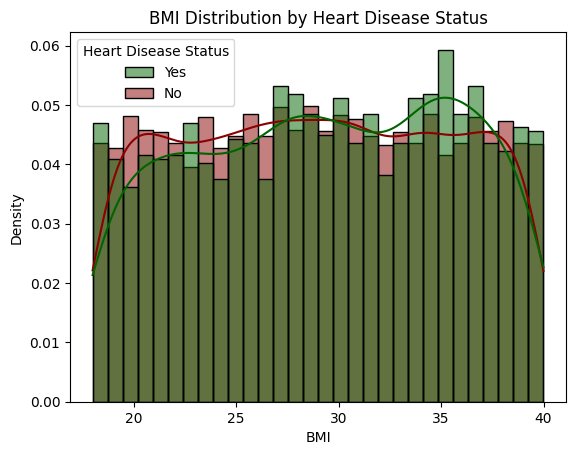

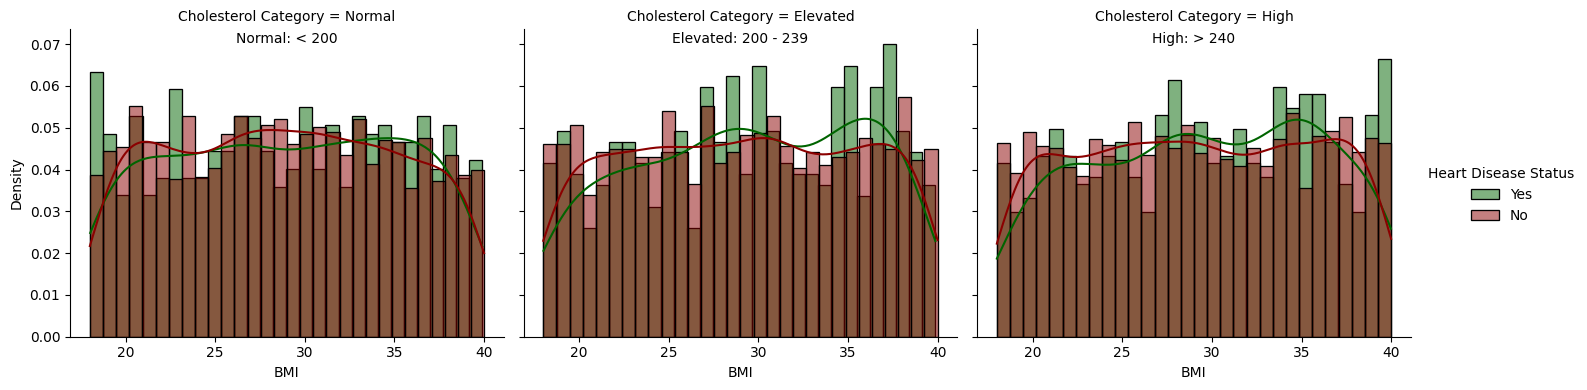

In [23]:
import pandas as pd
cleaned_data_Kmodes["Cholesterol Category"] = pd.cut(
    cleaned_data_Kmodes["Cholesterol Level"],
    bins=[0, 199, 239, float("inf")],  
    labels=["Normal", "Elevated", "High"],  
    right=True  
)
cleaned_data_Kmodes["Cholesterol Category"] = pd.Categorical(cleaned_data_Kmodes["Cholesterol Category"], categories=["Normal", "Elevated", "High"], ordered=True)

# Create a new column that quantizes the BMI ranges
cleaned_data_Kmodes["BMI Category"] = pd.cut(
    cleaned_data_Kmodes["BMI"],
    bins=[0, 18.5, 25, 30, float("inf")],  
    labels=["Underweight", "Normal", "Overweight", "Obese"],  
    right=True  # Include right edge in the bin
)
cleaned_data_Kmodes["BMI Category"] = pd.Categorical(cleaned_data_Kmodes["BMI Category"], categories=["Underweight", "Normal", "Overweight", "Obese"], ordered=True)

# Create a new column that quantizes the Blood Pressure ranges
cleaned_data_Kmodes["Blood Pressure Category"] = pd.cut(
    cleaned_data_Kmodes["Blood Pressure"],
    bins=[0, 120, 129, 139, float("inf")],
    labels=["Normal", "Elevated", "High", "Very High"],  
    right=True  
)
cleaned_data_Kmodes["Blood Pressure Category"] = pd.Categorical(cleaned_data_Kmodes["Blood Pressure Category"], categories=["Normal", "Elevated", "High", "Very High"], ordered=True)

cleaned_data_Kmodes["Stress Level"] = pd.Categorical(cleaned_data_Kmodes["Stress Level"], categories=["Low", "Medium", "High"], ordered=True)
cleaned_data_Kmodes["Alcohol Consumption"] = pd.Categorical(cleaned_data_Kmodes["Alcohol Consumption"], categories=["Low", "Medium", "High"], ordered=True)


# data_visualization_fran.create_histoplot(cleaned_data, "BMI", "Heart Disease Status")
data_visualization_fran.create_histoplot(cleaned_data_Kmodes, "BMI", "Heart Disease Status")
data_visualization_fran.create_histoplot(cleaned_data_Kmodes, "BMI", "Heart Disease Status", cat="Cholesterol Category")

In [ ]:
data_visualization_fran.create_histoplot(cleaned_data, "Stress Level", "Heart Disease Status")
data_visualization_fran.create_histoplot(cleaned_data, "Stress Level", "Heart Disease Status", cat="Alcohol Consumption")

In [ ]:
data_visualization_fran.create_histoplot(cleaned_data, "Blood Pressure", "Heart Disease Status")
data_visualization_fran.create_histoplot(cleaned_data, "Blood Pressure Category", "Heart Disease Status", cat="Diabetes")